# Trabalho 7: Treinamento de uma RNA feedforward MLP com uma camada escondida

**Projetar uma rede neural feedforward com uma camada escondida para modelar os dados disponíveis no arquivo "Trabalho6dados.xlsx"**

**1- Separar os dados em conjuntos de treinamento, validação e teste;**

**2- Utilizar backpropagation por Levenberg-Marquardt para treinar os pesos da RNA;**

**3- Utilizar o Early Stopping como critério de parada para evitar overtraining;**

**4- Utilizar coeficiente de determinação ou coeficiente de correlação para avaliar overfitting.**

**Apresentar gráficos relativos ao MSE de treinamento, validação (early stopping) e teste e os coeficientes de determinação ou correlação para todos os dados e para os dados de teste.**
**Apresentar os resultados para a melhor rede, mas também para outras redes com diferentes números de neurônios na camada escondida.**


# *Overtraining*

O *overtraining*, também conhecido como *overfitting*, é um problema comum em redes neurais feedforward e em outras técnicas de aprendizado de máquina. Isso ocorre quando o modelo se ajusta aos dados de treinamento, memorizando-os em vez de aprender padrões que podem generalizar bem para dados não vistos, como os dados de teste. especificar mais a rede apenas para aquele dado

> Fenomeno através do qual uma rede perde a habilidade de generalizar padrões similiares de entrada e saída [1]

Seja um conjunto de dados $D(x,y)$ proveniente de $y=f(x)+v$, $y\in \mathbb{R}^{c}$, $x\in \mathbb{R}^{m}$ e $v=[\begin{matrix}
 v_1& v_2 & ... & v_3
\end{matrix}]^{T}$; $v_i \in N(O,V)$ representando os ruídos nos dados, o modelo com sobreajuste é o modelo que “aprende” não apenas a função $f(x)$ desejada, mas também o ruído $v$, ou seja:

  $$\hat{y}=h(x)\cong f(x)+v$$

O modelo se torna excessivamente complexo e ajusta não apenas o sinal nos dados, mas também os detalhes irrelevantes e o ruído. Assim, usar muitas épocas de treinamento, pode levar o modelo a ajustar o ruído nos dados de treinamento em vez de aprender os padrões significativos.

Para evitar o *overtraining*, é crucial implementar técnicas como o *Early Stopping*, que interrompe o treinamento quando não há mais melhoria significativa no desempenho do modelo no conjunto de validação, ou considerar mudanças na estrutura da rede para simplificar o modelo, caso necessário.


# Evitando *Overtraining*

Geralmente, uma rede treinada através de back-propagation aprende em etapas durante a sessão de treinamento, indo de funções de mapeamento mais simples para mais complexas. Esse processo fica evidente ao tomarmos o histórico da função de custo (MSE) em função do número de épocas de treinamento. Ele parte de um valor alto e cai rapidamente, até começar a diminuir lentamente enquanto a rede caminha para um mínimo local na superfície de erro.[1]

Caso a sessão de treinamento não pare no ponto certo, podemos verificar o sobreajute. Das técnicas para reduzir o tamanho de cada dimensão de parâmetro são a regularização, como weight decay ou dropout, ou a Parada Precoce (*Early Stopping*). A parada precoce é amplamente usada porque é simples de entender e implementar e foi relatada como sendo superior aos métodos de regularização em muitos casos.

## 1. *Early Stopping*

O *Early Stopping* (“Parada Antecipada” ou “Parada Precoce”) serve exatamente para tentar definir manualmente o "ponto certo". Isso significa que no final de cada época, devemos calcular a precisão da classificação nos dados de validação. Quando a precisão parar de melhorar, terminamos o treinamento.

 Além disso, a Parada Antecipada também impede automaticamente o overfitting. Isto é, obviamente, uma coisa boa, embora nos estágios iniciais da experimentação possa ser útil desligar a Parada Antecipada, para que você possa ver quaisquer sinais de overfitting e usá-los para definir sua abordagem de regularização.



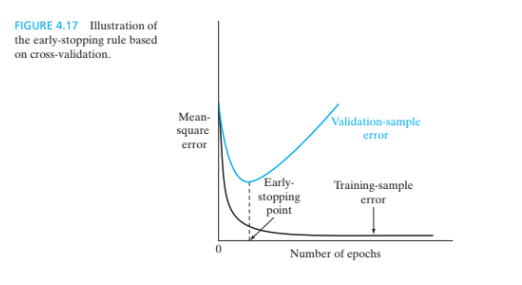 Fonte:[1]

## 2. Brute-force Pruning

O Brute-force Pruning é uma técnica que envolve a tentativa e erro de diferentes configurações de rede neural, removendo neurônios ou camadas desnecessárias. Após treinar uma rede neural, você pode avaliar o desempenho do modelo ao remover um neurônio ou uma camada por vez e observar como isso afeta a precisão nos dados de validação. Ao fazer isso repetidamente para diferentes partes da rede, é possível determinar quais partes contribuem significativamente para a precisão do modelo. A eliminação das partes menos importantes pode ajudar a reduzir a complexidade do modelo, evitando assim o overfitting.

## 3. Sensitivity Calculation

A Sensitivity Calculation envolve avaliar a sensibilidade da rede neural às pequenas mudanças nos dados de entrada. Um modelo sobreajustado geralmente é excessivamente sensível a variações mínimas nos dados de treinamento, enquanto um modelo bem generalizado é mais robusto a essas flutuações. Ao calcular a sensibilidade do modelo em relação aos dados de treinamento e validação, você pode identificar se o modelo está se ajustando demais aos dados de treinamento ou se está conseguindo generalizar eficazmente para novos dados.

## 4. k-fold Cross-validation ($D_{tr}$ e $D_{va}$)
A técnica de k-fold Cross-Validation envolve dividir o conjunto de dados em k partes iguais. O modelo é treinado em k-1 partes e validado na parte restante. Esse processo é repetido k vezes, garantindo que o modelo seja treinado e validado em diferentes subconjuntos de dados. Isso ajuda a avaliar o desempenho médio do modelo em diferentes conjuntos de dados de treinamento e validação, fornecendo uma estimativa mais robusta do desempenho do modelo.


## 5. Leave-out Cross-validation

A Leave-out Cross-Validation é uma variação da k-fold Cross-Validation, onde um único exemplo de dados é mantido como conjunto de teste, enquanto todos os outros exemplos são usados para treinamento. Esse processo é repetido para cada exemplo no conjunto de dados, garantindo que cada exemplo seja usado como conjunto de teste uma vez. Isso fornece uma avaliação abrangente do desempenho do modelo para diferentes pontos de dados, ajudando a identificar se o modelo está se ajustando excessivamente aos dados de treinamento ou se está generalizando bem para novos dados.

Essas técnicas, quando usadas em conjunto ou separadamente, ajudam a evitar o overfitting, melhorando a capacidade de generalização do modelo e tornando-o mais eficaz na previsão de novos dados.

# Métodos para quantificar generalização

## 1. Coeficiente de Determinação ($R^2$):

O coeficiente de determinação, frequentemente chamado de R², é uma métrica que quantifica a proporção da variância na variável de saída que é explicada pelo modelo.

R² varia de 0 a 1, onde 0 indica que o modelo não explica nenhuma variação nos dados de saída, e 1 indica que o modelo explica toda a variação nos dados de saída.

Em relação ao overfitting, um R² muito próximo de 1 no conjunto de treinamento pode ser um sinal de overfitting. Isso ocorre quando o modelo se ajusta tão bem aos dados de treinamento que se torna incapaz de generalizar para novos dados, resultando em um R² mais baixo no conjunto de teste

## 2. Coeficiente de Correlação de Pearson($r$):

O coeficiente de correlação de Pearson, representado por $r$, mede a relação linear entre duas variáveis, geralmente a variável de entrada e a variável de saída. O valor de $r$ varia de -1 a 1, onde -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra tende a diminuir), 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra tende a aumentar também) e 0 indica ausência de correlação linear. Um valor significativamente menor de  $r$ nos dados de teste em comparação aos dados de treinamento pode indicar overfitting, sugerindo que o modelo está superajustando-se aos dados de treinamento e não generalizando bem para novos dados.

## 3.  k-fold Cross-validation + medida de generalização ($D_{tr}$ e $D_{va}$):
A técnica de k-fold Cross-Validation, combinada com medidas de generalização nos conjuntos de treinamento ($D_{tr}$) e validação ($D_{va}$), ajuda a avaliar o desempenho médio do modelo em diferentes subconjuntos de dados. Isso fornece uma estimativa robusta da capacidade de generalização do modelo. Um modelo que generaliza bem terá métricas de desempenho consistentes em ambos os conjuntos.

## 4. F-Test (extra sum-of-squares):
O F-Test, também conhecido como Extra Sum-of-Squares, é uma técnica estatística que compara modelos alternativos para determinar se adicionar variáveis explicativas adicionais (ou seja, aumentar a complexidade do modelo) melhora significativamente a explicação da variabilidade nos dados. Um resultado positivo pode indicar overfitting, pois a adição de variáveis pode estar capturando ruído em vez de padrões reais.

## 5. Critério de informação de akaike (AIC):

O Critério de Informação de Akaike (AIC) é uma métrica que leva em consideração a qualidade do ajuste do modelo e a complexidade do modelo, penalizando modelos mais complexos. Modelos com valores menores de AIC são considerados melhores. Ao comparar diferentes modelos, o AIC pode ajudar a identificar se um modelo mais complexo é justificado ou se um modelo mais simples é preferível para evitar overfitting.

## 6. Standard error of the regression ou Residual standard error

O Erro Padrão da Regressão (também conhecido como Erro Padrão Residual) mede a dispersão dos dados ao redor da linha de melhor ajuste (ou superfície de decisão) do modelo. Um erro padrão mais baixo indica que os pontos de dados estão mais próximos da linha de ajuste, sugerindo uma boa generalização do modelo. Quando o erro padrão é muito baixo nos dados de treinamento, mas alto nos dados de teste, pode ser um indicativo de overfitting, pois o modelo está se ajustando demais aos dados de treinamento e não generalizando bem para novos dados.

In [205]:
import numpy as np

class Neuron():
    def __init__(self, input_dim, activation_function, index):
        self.index = index
        self.input_dim = input_dim
        self.weights = np.random.rand(input_dim)
        self.bias = np.array(np.random.random())
        self.activation_function = self.set_activation_function(activation_function)
        self.prime_activation = self.set_prime_activation(activation_function)

    def summing_junction(self):
        return(np.dot(self.weights, self.input) + self.bias)

    def process_output(self, input_signal):
      self.input = np.array(input_signal)
      self.vk = self.summing_junction()
      return (self.activation_function(self.vk))

    def set_activation_function(self, activation_function):
        if (activation_function == 'tanh'):
            return lambda x: np.tanh(x)
        if (activation_function == 'linear'):
            return lambda x: x

    def set_prime_activation(self, activation):
        if activation == 'tanh':
            return lambda x: 1 - np.tanh(x) ** 2
        elif activation == 'linear':
            return lambda x: 1    
    
    def set_delta_w(self, output_error, learning_rate):
      J_w = np.array([(self.prime_activation(self.vk) * self.input.T * self.layer_error)])
      J_ww = np.dot(J_w.T,  J_w)
      grad = np.dot(J_w.T, output_error)
      return(np.dot(np.linalg.inv(J_ww + np.dot(learning_rate, np.eye(self.input_dim))), grad))

    def set_delta_b(self, output_error, learning_rate):
        J_b = np.array([(self.prime_activation(self.vk) * self.layer_error)])
        J_bb = np.dot(J_b.T,  J_b)
        grad = np.dot(J_b.T, output_error)
        return(np.dot(np.linalg.inv(J_bb + np.dot(learning_rate, np.eye(1))), grad))

    def set_error_to_propag(self):
      return (self.prime_activation(self.vk) * self.weights.T)

    def backpropagation(self, output_error, learning_rate, layer_error):
        self.layer_error = layer_error[self.index] if (len(layer_error) > 1) else layer_error[0]
        self.delta_w = self.set_delta_w(output_error, learning_rate)
        self.delta_b = self.set_delta_b(output_error, learning_rate)
        self.error_to_propag = self.set_error_to_propag()
        self.weights -= self.delta_w.flatten()
        self.bias -= self.delta_b[0]
        #self.print_backpropagation_parameters()
        return (self.error_to_propag)

    def print_backpropagation_parameters(self):
        print ("ΔW.T = ", self.delta_w.T, " | ΔB = ", self.delta_b.T, "| φ'(vk).W = ", self.error_to_propag.T)



In [206]:
class DenseLayer():
    def __init__(self):
        self.neurons = []

    def __init__(self, input_dim, output_dim, activation_function):
        self.neurons = [Neuron(input_dim, activation_function, i) for i in range(output_dim)]

    def forward_propagation(self, input_signal):
        outputs = []
        for neuron in self.neurons:
            output = neuron.process_output(input_signal)
            outputs.append(output)
        return outputs
    
    def backpropagation(self, output_error, learning_rate, layer_error):
        outputs = []
        for neuron in self.neurons:
            output = neuron.backpropagation(output_error, learning_rate, layer_error[0])
            outputs.append(output)
        return np.array(outputs)

    def set_weights(self, weights):
        for neuron, weight in zip(self.neurons, weights):
            neuron.weights = np.array(weight)

    def set_bias(self, bias):
        for neuron, b in zip(self.neurons, bias):
            neuron.bias = np.array(b)

    def get_weights(self):
        weights = [neuron.weights for neuron in self.neurons]
        return np.vstack(weights)

    def get_bias(self):
        bias = [neuron.bias for neuron in self.neurons]
        return np.vstack(bias)


In [207]:
class Network():
    def __init__(self):
        self.layers = []
        self.forward_outputs = []
        self.input_signal = None
        self.loss = self.set_loss()
        self.prime = self.set_loss_prime()

    # runs forward through test data
    def predict(self, x_test):
        samples = len(x_test)
        result = []
        for sample in range(samples):
            input_signal = x_test[sample]
            self.forward_propagation(input_signal)
            result.append(self.y_pred)
        return (np.array(result).flatten())

    def earlyStopping(self, x_val, y_val, epoch, patience):
        for val_sample in range(len(x_val)):
            val_input_signal = x_val[val_sample]
            val_output = self.predict(val_input_signal)
            self.val_error += self.loss(y_val[val_sample], val_output)
        self.val_error /= len(x_val)
        self.HistCostVal.append(self.val_error)
        if epoch == 0:
                self.best_val_error = self.val_error
        if self.val_error < self.best_val_error:
                        self.best_val_error = self.val_error
                        self.patience_counter = 0
        else:
            self.patience_counter += 1
        if self.patience_counter >= patience:
            print(f'Early Stopping: Treinamento interrompido na época {epoch + 1} devido à falta de melhoria no erro de validação.')
            return (True)
        return(False)

    def train(self, x_train, y_train, epochs, learning_rate, x_val, y_val, patience, print_epochs=True):
        samples = len(x_train)
        self.HistCost = []
        self.HistCostVal = []
        self.val_error, self.best_val_error, self.patience_counter = 0, 0, 0
        for epoch in range(epochs):
            error = 0
            for sample in range(samples):
                input_signal = x_train[sample]
                self.forward_propagation(input_signal)
                error += self.loss(y_train[sample], self.y_pred)
                self.backpropagation(y_train[sample], learning_rate)
            error /= samples
            self.HistCost.append(error)
            if print_epochs:
                print('epoch %d/%d error=%f val_error=%f' % (epoch + 1, epochs, error, self.val_error))
            if (self.earlyStopping(x_val, y_val, epoch, patience) == True):
                break


    def set_loss(self, loss="MSE"):
        if loss == "MSE":
            return lambda y_true, y_pred: np.mean(np.power(y_true - y_pred, 2))

    def set_loss_prime(self, loss="MSE"):
        if loss == "MSE":
            return lambda y_true, y_pred: 2 * (y_pred - y_true) / y_true.size

    def add(self, input_dim, output_dim, activation_function):
        new_layer = DenseLayer(input_dim, output_dim, activation_function)
        self.layers.append(new_layer)
        return (new_layer)

    def forward_propagation(self, input_signal):
        self.input_signal = input_signal
        forward_outputs = []
        y = input_signal
        for layer in self.layers:
            y = layer.forward_propagation(y)
            forward_outputs.append(y)
        self.forward_outputs = forward_outputs
        self.y_pred = y

    def backpropagation(self, y_desired, learning_rate=0.01):
        output_error = np.array([self.y_pred - y_desired])
        layer_error = np.array([[1]])
        for layer in reversed(self.layers):
            layer_error = layer.backpropagation(output_error, learning_rate, layer_error)

    def print_forward_propagation(self):
        print ("--------------------Forward Propagation----------------------")
        tabs = "\t"
        print("[Input Signal] ---→ ", self.input_signal)
        for i, output in enumerate(self.forward_outputs):
            layer_name = "Output Layer" if i == len(self.forward_outputs) - 1 else f"Hidden Layer {i}"
            print(tabs, "|\n", tabs, f"↳[{layer_name}] ---→ ", output)
        tabs += "\t"

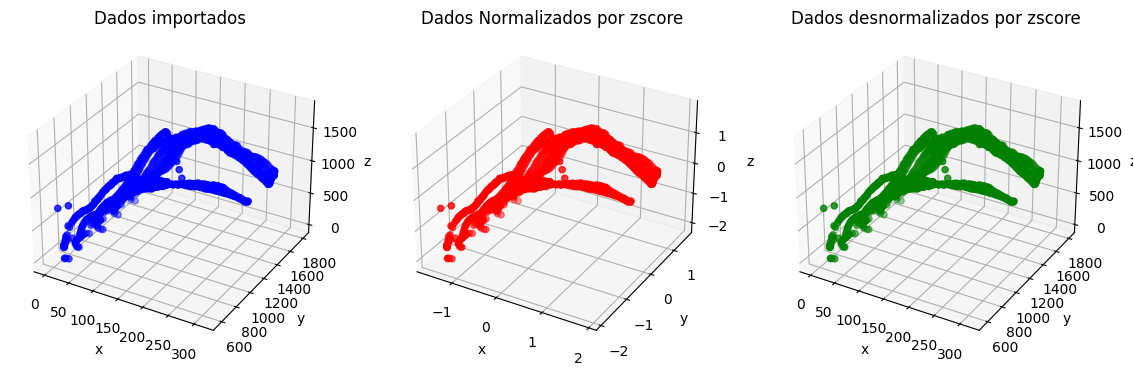

In [208]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

def GetData():
  df = pd.read_excel("./Trabalho6dados.xlsx")
  x1 = df['x0']
  x2 = df['x1']
  y = df['y']
  return([x1, x2, y])

def ZScore(Data):
  return ((Data - np.mean(Data)) / np.std(Data))

def DenormalizeData(Data, Orig):
  return (Data * Orig.std() + Orig.mean())

def GetNormData():
  x = GetData()
  for i in range(len(x)):
    x[i] = ZScore(x[i])
  return (x)

# @brief: plota os dados importados
def PlotData(fig):
  x, y, z = GetData()
  ax = fig.add_subplot(1, 3, 1, projection='3d')
  ax.scatter(x, y, z, c='blue', marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados importados")
  return (ax)

def PlotNormalizedData(fig, pos, label, color):
  xNorm, yNorm, zNorm = GetNormData()
  ax = fig.add_subplot(1, 3, pos, projection='3d')
  ax.scatter(xNorm, yNorm, zNorm, c=color, marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados Normalizados por " + label)

def PlotDenormalizedData(fig, pos, label, color):
  xNorm, yNorm, zNorm = GetNormData()
  x, y, z = GetData()
  xDenorm, yDenorm, zDenorm = DenormalizeData(xNorm, x), DenormalizeData(yNorm, y), DenormalizeData(zNorm, z)
  ax = fig.add_subplot(1, 3, pos, projection='3d')
  ax.scatter(xDenorm, yDenorm, zDenorm, c=color, marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados desnormalizados por " + label)
  return (xNorm, yNorm)

def ConfGraph3D(ax, x, y, z, title):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(title)

def PlotFigure():
  fig = plt.figure(figsize=(14, 7))
  PlotData(fig)
  PlotNormalizedData(fig, 2, 'zscore', 'red')
  PlotDenormalizedData(fig, 3, 'zscore', 'green')

PlotFigure()

In [209]:
from sklearn.model_selection import train_test_split

x1, x2, y = GetNormData()
X = np.vstack([x1, x2]).T
Y = np.array(y)
# Separando os dados em conjuntos de treinamento (70%), validação (15%) e teste (15%)
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [210]:
x1, x2, y = GetData()
XDenorm = np.vstack([x1, x2]).T
YDenorm = np.array(y)
x_train_orig, x_temp_orig, y_train_orig, y_temp_orig = train_test_split(XDenorm, YDenorm, test_size=0.3, random_state=42)
x_val_orig, x_test_orig, y_val_orig, y_test_orig = train_test_split(x_temp_orig, y_temp_orig, test_size=0.5, random_state=42)

In [220]:
def PlotCosts(fig, Hist, pos, label=""):
  ax = fig.add_subplot(1, 3, pos)
  k = np.linspace(0, len(Hist), len(Hist), dtype=int)
  ax.plot(k, Hist)
  ax.set_xlabel('Épocas')
  ax.set_ylabel('Custo')
  ax.set_title("Histórico de custo" + label)
  ax.grid(True)

def PlotTrainingResult(fig, network):
  y_pred = network.predict(x_test_orig)
  ax = fig.add_subplot(1, 3, 3, projection='3d')
  ax.scatter(x_test_orig[:, 0], x_test_orig[:, 1], y_test_orig, c='blue', marker='o', label='Dados Reais')
  ax.scatter(x_test_orig[:, 0], x_test_orig[:, 1], y_pred, c='red', marker='^', label='Previsões da Rede Neural')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('Saída Esperada (y)')
  ax.legend()

In [218]:

def CreateNetwork(dim=2, w_h=None, b_h=None, w_o=None, b_o=None, up=True):
    network = Network()
    hiddenLayer = network.add(2, dim, 'tanh')
    outputLayer = network.add(dim, 1, 'linear')
    if (up == True):
        updateNetwork(hiddenLayer, outputLayer, w_h, b_h, w_o, b_o)
    print("W_h: ", (hiddenLayer.get_weights()).T, "B_h:", (hiddenLayer.get_bias()).T)
    print("W_o: ", (outputLayer.get_weights()).T, "B_o:", (outputLayer.get_bias()).T)
    return (network)

def updateNetwork(hiddenLayer, outputLayer, w_h, b_h, w_o, b_o):
    hiddenLayer.set_weights(w_h)
    hiddenLayer.set_bias(b_h)
    outputLayer.set_weights(w_o)
    outputLayer.set_bias(b_o)

def TestNetwork(network, patience=10, learning_rate=0.001, epochs=50, print_epochs=True):
    fig = plt.figure(figsize=(14, 7))
    network.train(x_train, y_train, epochs, learning_rate, x_val, y_val, patience, print_epochs)
    PlotCosts(fig, network.HistCost, pos=1, label=" Dados de Treinamento")
    PlotCosts(fig, network.HistCostVal, pos=2, label=" Dados de Validação")
    PlotTrainingResult(fig, network)

W_h:  [[0.5 0.5]
 [0.5 0.5]] B_h: [[0.5 0.5]]
W_o:  [[0.5]
 [0.5]] B_o: [[0.5]]
epoch 1/50 error=138.795178 val_error=0.000000
epoch 2/50 error=210.763863 val_error=104.014026
epoch 3/50 error=710.026944 val_error=314.243031
epoch 4/50 error=2199.015361 val_error=3281.493424
epoch 5/50 error=1467.862296 val_error=1545.327978
Early Stopping: Treinamento interrompido na época 5 devido à falta de melhoria no erro de validação.


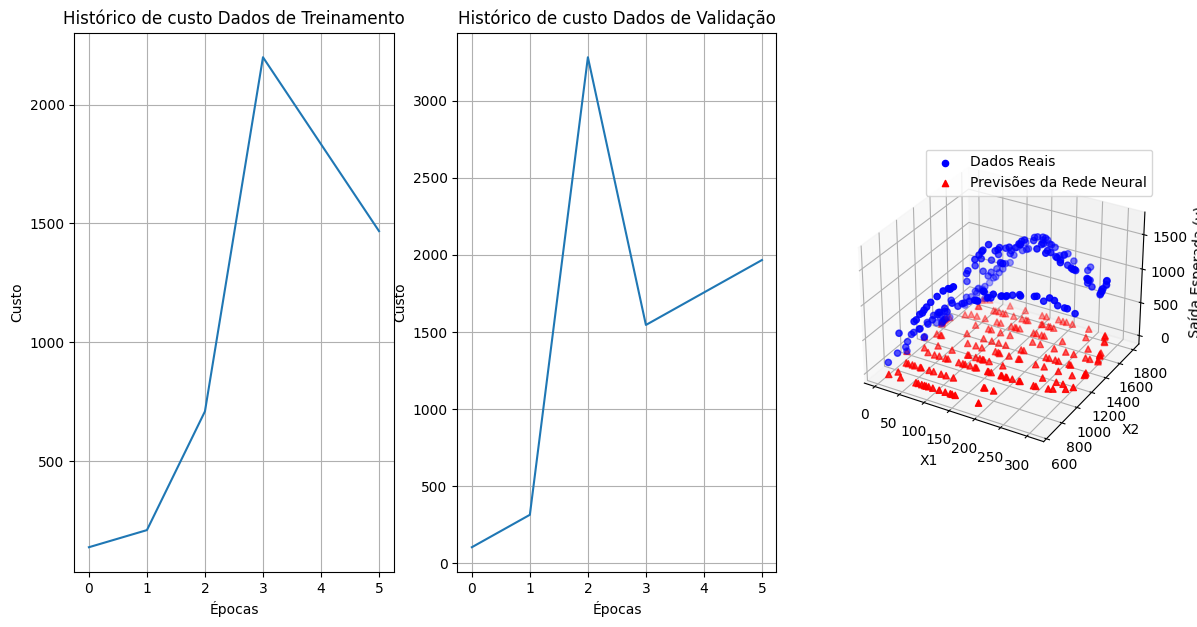

In [221]:
net = CreateNetwork(    w_h=np.array([[0.5, 0.5], [0.5, 0.5]]), 
                        b_h=np.array([0.5 , 0.5]),
                        w_o=np.array([[0.5, 0.5]]),
                        b_o=np.array([0.5]))
TestNetwork(net, patience=5)


W_h:  [[0.5 0.5 0.5]
 [0.5 0.5 0.5]] B_h: [[0.5 0.5 0.5]]
W_o:  [[0.5]
 [0.5]
 [0.5]] B_o: [[0.5]]
epoch 1/3 error=273.540170 val_error=0.000000
epoch 2/3 error=286.930201 val_error=85.809045
epoch 3/3 error=369.383531 val_error=2.659184


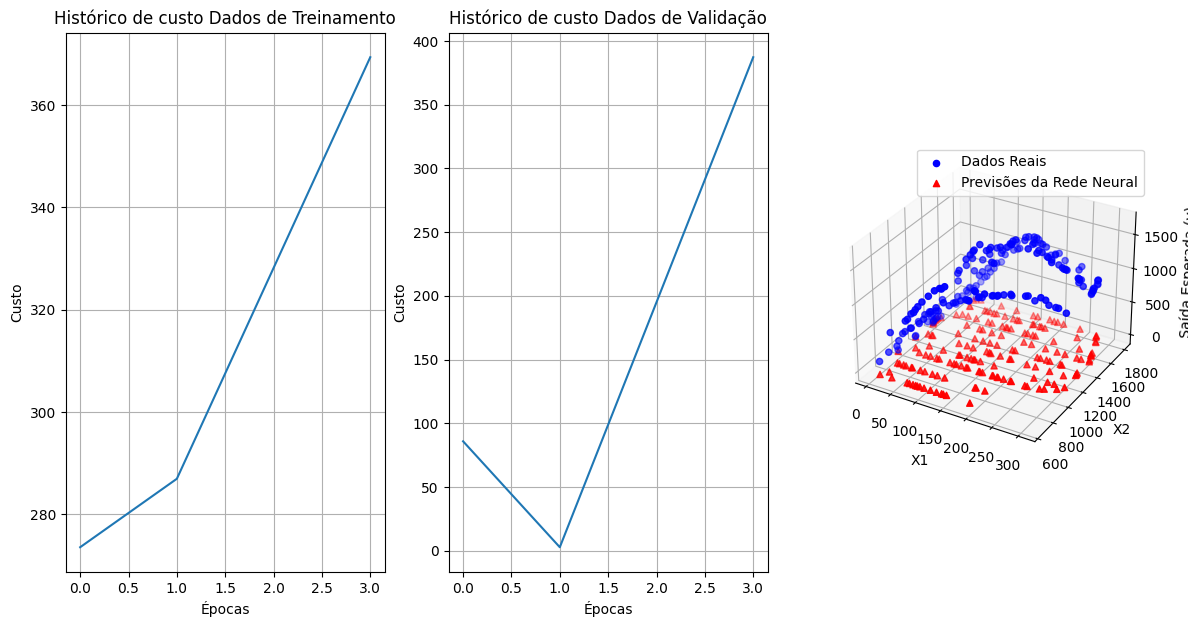

In [222]:
net = CreateNetwork(    dim=3,
                        w_h=np.array([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]), 
                        b_h=np.array([0.5 , 0.5, 0.5]),
                        w_o=np.array([[0.5, 0.5, 0.5]]),
                        b_o=np.array([0.5]))
TestNetwork(net, epochs=3)


W_h:  [[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]] B_h: [[0.5 0.5 0.5 0.5]]
W_o:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] B_o: [[0.5]]
epoch 1/50 error=485.438508 val_error=0.000000
epoch 2/50 error=520.383582 val_error=967.792948
epoch 3/50 error=820.234402 val_error=352.029511
epoch 4/50 error=521.823414 val_error=843.532939
epoch 5/50 error=815.790139 val_error=244.211930
epoch 6/50 error=687.960060 val_error=631.149432
epoch 7/50 error=696.256203 val_error=391.868409
epoch 8/50 error=735.308365 val_error=2550.724670
epoch 9/50 error=519.042871 val_error=372.075082
epoch 10/50 error=536.005873 val_error=400.382944
epoch 11/50 error=872.790699 val_error=350.828845
epoch 12/50 error=504.842674 val_error=923.044053
epoch 13/50 error=551.907094 val_error=354.224486
epoch 14/50 error=1666.396047 val_error=1601.823115
epoch 15/50 error=2187.381099 val_error=177.293197
epoch 16/50 error=634.490867 val_error=1347.314599
epoch 17/50 error=630.275696 val_error=660.995495
epoch 18/50 error=524.234247 val_error

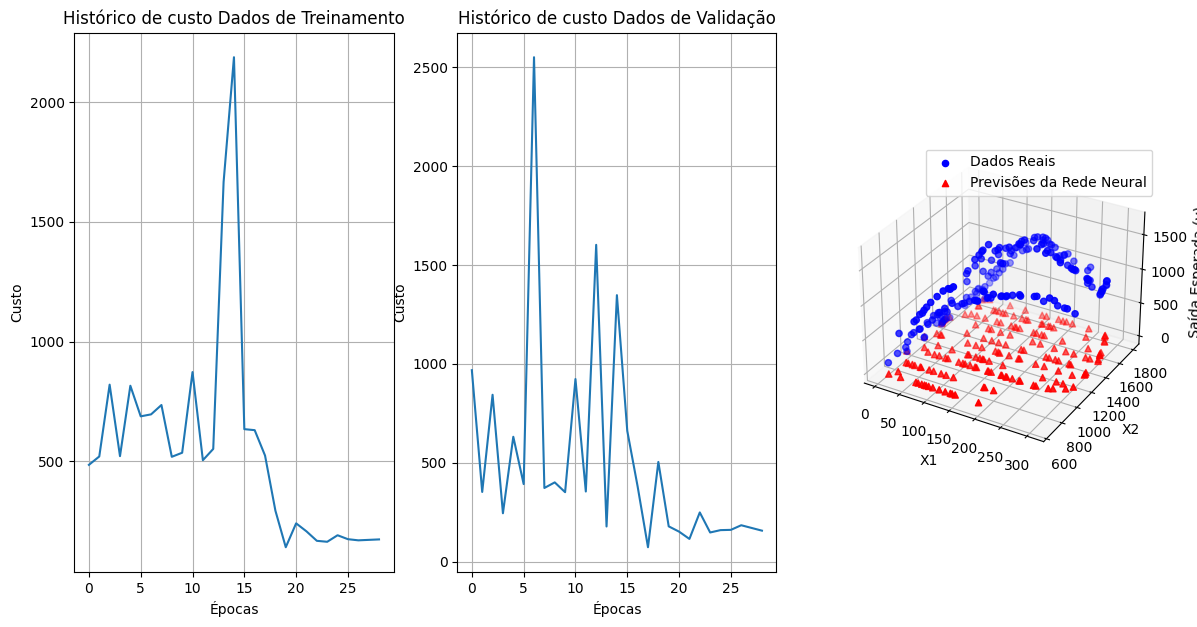

In [223]:
net = CreateNetwork(    dim=4,
                        w_h=np.array([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]), 
                        b_h=np.array([0.5 , 0.5, 0.5, 0.5]),
                        w_o=np.array([[0.5, 0.5, 0.5, 0.5]]),
                        b_o=np.array([0.5]))
TestNetwork(net)


W_h:  [[0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]] B_h: [[0.5 0.5 0.5 0.5 0.5]]
W_o:  [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]] B_o: [[0.5]]


epoch 1/50 error=1602.164506 val_error=0.000000
epoch 2/50 error=3791.521019 val_error=6188.353285
epoch 3/50 error=1216.778767 val_error=825.721389
epoch 4/50 error=1902.478202 val_error=2175.926941
epoch 5/50 error=1617.759297 val_error=1599.911583
epoch 6/50 error=1717.263698 val_error=1799.405042
epoch 7/50 error=1680.287824 val_error=1725.019743
epoch 8/50 error=1693.720635 val_error=1752.009570
epoch 9/50 error=1688.800294 val_error=1742.118917
epoch 10/50 error=1690.597151 val_error=1745.730284
epoch 11/50 error=1689.940234 val_error=1744.409917
epoch 12/50 error=1690.180301 val_error=1744.892427
Early Stopping: Treinamento interrompido na época 12 devido à falta de melhoria no erro de validação.


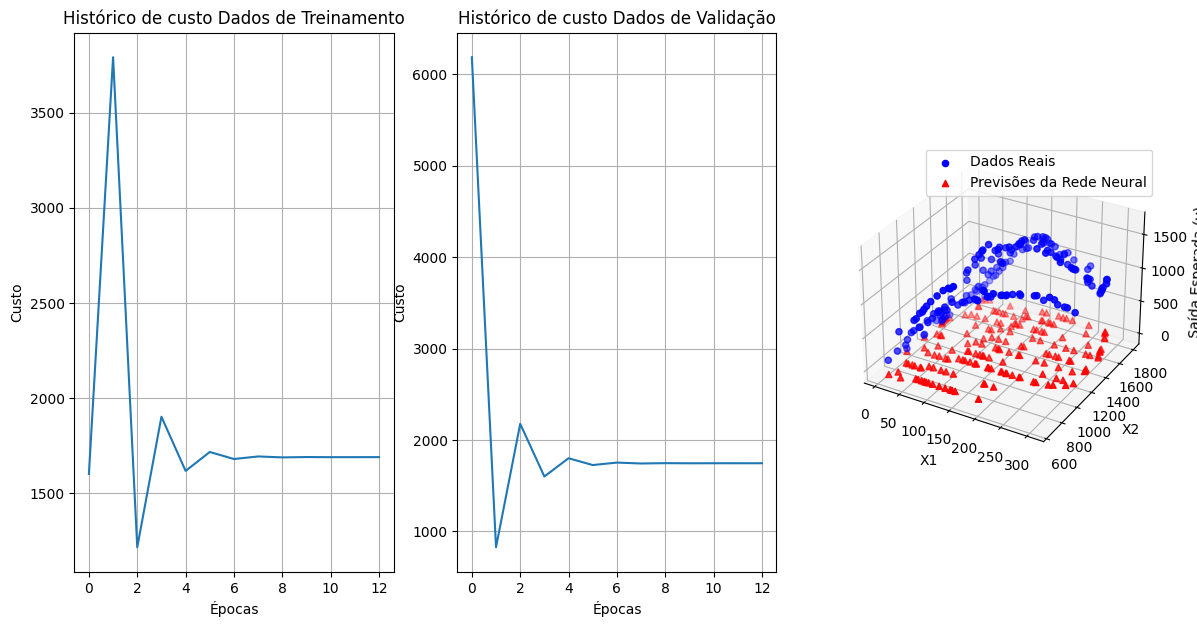

In [224]:
net = CreateNetwork(    dim=5,
                        w_h=np.array([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]), 
                        b_h=np.array([0.5 , 0.5, 0.5, 0.5, 0.5]),
                        w_o=np.array([[0.5, 0.5, 0.5, 0.5, 0.5]]),
                        b_o=np.array([0.5]))
TestNetwork(net)


W_h:  [[0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5]] B_h: [[0.5 0.5 0.5 0.5 0.5 0.5]]
W_o:  [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]] B_o: [[0.5]]


epoch 1/50 error=18258.909871 val_error=0.000000
epoch 2/50 error=10844.291095 val_error=11431.383684
epoch 3/50 error=5673.807876 val_error=8512.060606
epoch 4/50 error=6031.022301 val_error=657.162166
epoch 5/50 error=3730.765818 val_error=4480.644286
epoch 6/50 error=3113.754467 val_error=345.744361
epoch 7/50 error=3836.399768 val_error=537.795534
epoch 8/50 error=3276.809608 val_error=9495.170549
epoch 9/50 error=2547.045295 val_error=3620.868204
epoch 10/50 error=3125.576716 val_error=2225.016334
epoch 11/50 error=2497.068774 val_error=7208.824416
epoch 12/50 error=2141.969046 val_error=7980.746605
epoch 13/50 error=2271.956090 val_error=1487.619690
epoch 14/50 error=1440.129964 val_error=373.931186
epoch 15/50 error=726.746286 val_error=666.921223
epoch 16/50 error=674.342895 val_error=160.344584
epoch 17/50 error=764.519614 val_error=1211.876393
epoch 18/50 error=1054.411514 val_error=3104.027247
epoch 19/50 error=1268.399926 val_error=2286.571582
epoch 20/50 error=1577.761442 

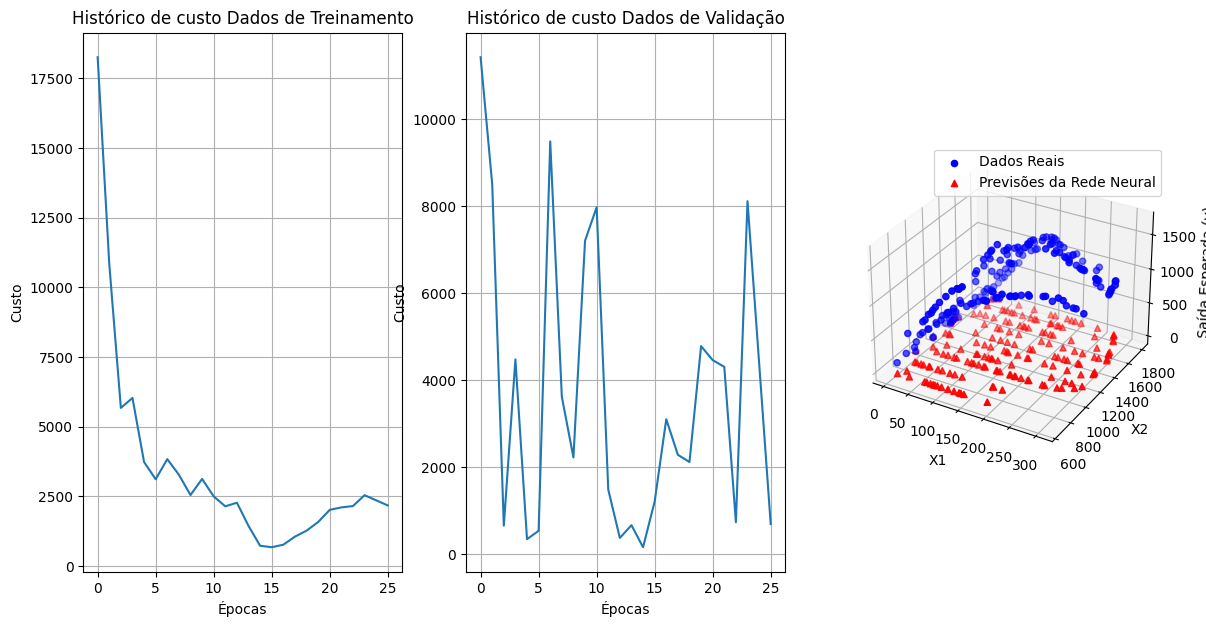

In [225]:
net = CreateNetwork(    dim=6,
                        w_h=np.array([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]), 
                        b_h=np.array([0.5 , 0.5, 0.5, 0.5, 0.5, 0.5]),
                        w_o=np.array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
                        b_o=np.array([0.5]))
TestNetwork(net)


# Referências bibliográficas

**[1]** HAYKIN, S. **Neural Networks and Learning Machines**. 3ed. Pearson, 2009